In [35]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import math

# Single Building Parameterization

## Set Up

In [36]:
n = 30
grid_size = 10

x = np.linspace(-grid_size, grid_size, n)
y = np.linspace(-grid_size, grid_size, n)
X,Y = np.meshgrid(x,y)
Z = 1
height = 3
L, W, H = 3,3,5

wind_velocity_x = 1.0
wind_velocity_y = 0

U = np.ones_like(X)*wind_velocity_x
V = np.ones_like(Y)*wind_velocity_y

building_pos_x = 0
building_pos_y = 0
building_pos_z = 0



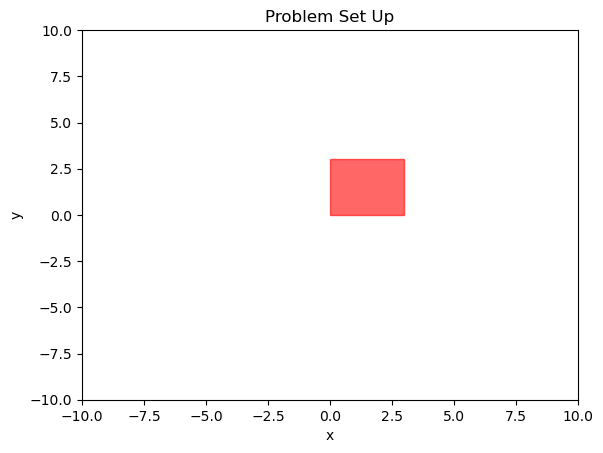

In [37]:
plt.gca().add_patch(plt.Rectangle((building_pos_x, building_pos_y), L, W, fill=True, color='red', alpha=0.6, label='Building'))
plt.ylim(-grid_size, grid_size)
plt.xlim(-grid_size, grid_size)
plt.xlabel('x')
plt.ylabel('y')
plt.title("Problem Set Up")
plt.show()

## Wind Inside Building

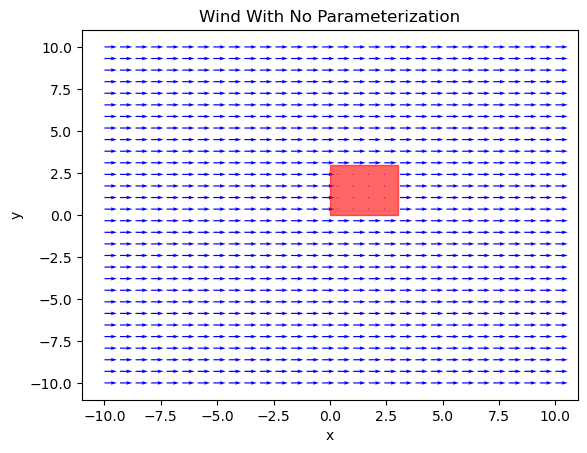

In [38]:
# make windflow 0 in the building zone
mask1 = X <= building_pos_x + L 
mask2 = X >= building_pos_x

mask3 = Y <= building_pos_y + W
mask4 = Y >= building_pos_y

mask = mask1*mask2*mask3*mask4
U[mask] = 0
V[mask] = 0


z_fixed = round(n/2)
plt.quiver(X, Y, U, V, scale=40, color='blue')
plt.gca().add_patch(plt.Rectangle((building_pos_x, building_pos_y), L, W, fill=True, color='red', alpha=0.6, label='Building'))
plt.xlabel('x')
plt.ylabel('y')
plt.title("Wind With No Parameterization")
plt.show()


## Displacement Zones

4.054054054054054


/var/folders/gb/p66rxr192g3dm6_pwx86d65m0000gn/T/ipykernel_53926/1774473727.py:14: RuntimeWarning: divide by zero encountered in divide
  displacement_x = np.square(X/XA_x) + np.square(Y/XA_y)


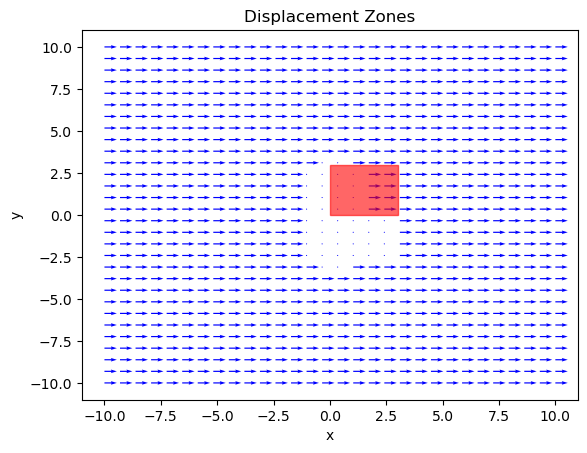

In [39]:
# calculate variables phi, L_f, 
phi = math.acos(wind_velocity_x / np.sqrt(wind_velocity_x**2 + wind_velocity_y**2))
L_f = (2 * W) / (1 + (0.8 * (W/H)))

print(L_f)
# calculate half-axis values
XA_x = L_f * np.sin(phi)**2 * np.sqrt(1 - (Z/(0.6*H))**2)
XA_y = 0.5 * W

YA_x = 0.5 * L
YA_y = L_f * np.cos(phi)**2 * np.sqrt(1 - (Z/(0.6*H))**2)

#displacement zone 1
displacement_x = np.square(X/XA_x) + np.square(Y/XA_y)
mask_displacement_x = displacement_x <= 1

U[mask_displacement_x] = 0
V[mask_displacement_x] = 0

#displacement zone 2
displacement_y = np.square(X/YA_x) + np.square(Y/YA_y)
mask_displacement_y = displacement_y <= 1

U[mask_displacement_y] = 0
V[mask_displacement_y] = 0

plt.quiver(X, Y, , V, scale=40, color='blue')
plt.gca().add_patch(plt.Rectangle((building_pos_x, building_pos_y), L, W, fill=True, color='red', alpha=0.6, label='Building'))
plt.xlabel('x')
plt.ylabel('y')
plt.title('Displacement Zones')
plt.show()

## Set up For Cavity and Wake Zones

In [40]:
# Calculate W_eff and L_eff
v_magnitude = math.sqrt(wind_velocity_x**2 + wind_velocity_y**2)

hat_vx = wind_velocity_x / v_magnitude
hat_vy = wind_velocity_y / v_magnitude

W_eff = W#abs(W * hat_vy - L * hat_vx)
L_eff = L#abs(W * hat_vx + L * hat_vy)

phi = math.acos(wind_velocity_x / np.sqrt(wind_velocity_x**2 + wind_velocity_y**2))
L_f = (2 * W_eff) / (1 + (0.8 * (W_eff/H)))
L_r = (1.8*W_eff) / (((L_eff/H)**0.3) * (1 + 0.24*W_eff / H))

d_l = np.sqrt(np.square(np.abs(X - building_pos_x)) + np.square(np.abs(Y - building_pos_y)) + np.square(np.abs(Z-building_pos_z)))
d_N = L_r * np.sqrt((1 - np.square(Z/H))*(1- np.square(Y/H)))

U_H = wind_velocity_x
V_H = wind_velocity_y

U_Z = wind_velocity_x
V_Z = wind_velocity_y


/var/folders/gb/p66rxr192g3dm6_pwx86d65m0000gn/T/ipykernel_53926/2718729157.py:15: RuntimeWarning: invalid value encountered in sqrt
  d_N = L_r * np.sqrt((1 - np.square(Z/H))*(1- np.square(Y/H)))


## Cavity Zone

In [41]:
A_x = L_r * np.sqrt(1 - np.square(Z/H))
A_y = 0.5 * W_eff

cavity = np.square(X/A_x) + np.square(Y/A_y)

mask1 = cavity <= 1

cavity_mask = mask1

U_cavity = -U_H * np.square(1 - d_l/d_N)
V_cavity = -V_H * np.square(1 - d_l/d_N)

U[cavity_mask] = U_cavity[cavity_mask]
V[cavity_mask] = V_cavity[cavity_mask]




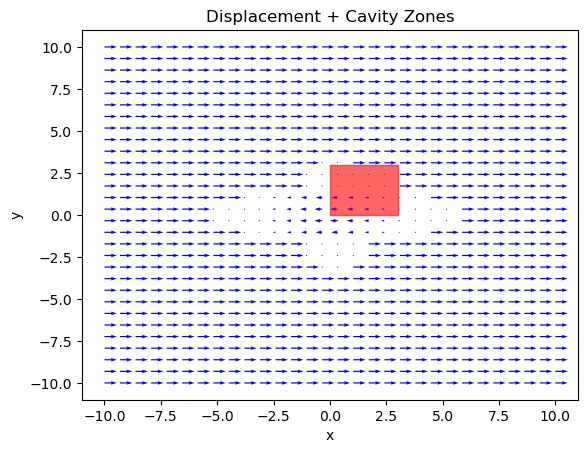

In [42]:
plt.quiver(X, Y, U, V, scale=40, color='blue')
plt.gca().add_patch(plt.Rectangle((building_pos_x, building_pos_y), L, W, fill=True, color='red', alpha=0.6, label='Building'))
plt.xlabel('x')
plt.ylabel('y')
plt.title('Displacement + Cavity Zones')
plt.show()